# Machine Learning Model to Predict Pulsar Signals from Numeric Dataset



## Approach to the Numerical Model

Here, we experimented with multiple classifiers to solve the given problem. The following steps outline our approach:

1. **Classifiers Tested:**
   - **Support Vector Machine (SVM)**
   - **Random Forest**
   - **Neural Network**
   - **Voting Classifier** (combination of SVM and Random Forest)

2. **Data Preprocessing:**
   - We standardized the numerical data using **StandardScaler** to ensure:
     - Zero mean
     - Unit variance
   - Standardization was essential to make the data suitable for distance-based classifiers such as SVM and KNN.

3. **Hyperparameter Tuning:**
   - We performed hyperparameter tuning using **RandomizedSearchCV** to optimize the performance of the models. This allowed us to efficiently explore a range of hyperparameters and select the best configuration for each classifier.

4. **Model Evaluation:**
   - After evaluating the models, the **Voting Classifier** (combination of SVM and Random Forest) performed the best, achieving an accuracy of **98.16%**.
   - This classifier demonstrated a balanced performance, optimizing both **precision** and **recall**.

Overall, the Voting Classifier was selected as the final model due to its superior performance compared to other models tested.


#### Download dependecies: ```pip install pandas numpy scikit-learn matplotlib seaborn torch  torchvision```

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, average_precision_score

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

##
### This function plots the Precision-Recall Curve for a given model.
#### Plots the Precision-Recall Curve and computes the average precision score for a model.

In [4]:
def plot_precision_recall_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        if isinstance(model, VotingClassifier):
            probas = [clf.predict_proba(X_test)[:, 1] for clf in model.estimators_]
            y_prob = np.mean(probas, axis=0)
        else:
            y_prob = model.decision_function(X_test)

    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', label=f'AP = {avg_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} - Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()


##
### This function plots the ROC curve and calculates the AUC score

In [6]:
def plot_roc_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        if isinstance(model, VotingClassifier):
            probas = [clf.predict_proba(X_test)[:, 1] for clf in model.estimators_]
            y_prob = np.mean(probas, axis=0)
        else:
            y_prob = model.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guess)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


###
### This block loads the training and testing datasets, cleans the data, and splits it into features and targets.
####  Load, clean, and preprocess data (Drop unnecessary columns, handle missing values, and Scale features).

In [8]:
# Collecting data
training_data = pd.read_csv('./pulsar_test.csv')
testing_data = pd.read_csv('./pulsar_training.csv')

# Cleaning Data
training_data.drop(columns=['Unnamed: 0'], inplace=True)
testing_data.drop(columns=['Unnamed: 0'], inplace=True)
training_data.dropna(inplace=True)
testing_data.dropna(inplace=True)

# Splitting into Features and Target
X_train = training_data.iloc[:, :-1]
y_train = training_data.iloc[:, -1]
X_test = testing_data.iloc[:, :-1]
y_test = testing_data.iloc[:, -1]

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#### Model 1
#### SVM Model

In [10]:
# Hyperparameter Tuning
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [3, 4, 5],
    'coef0': [0, 0.1, 1, 10],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'max_iter': [5000,10000,-1],
    'cache_size': [200, 500, 1000]
}

svm_model = SVC(probability=True)
svm_search = RandomizedSearchCV(svm_model, svm_param_grid, n_iter=10, cv=2, n_jobs=-1, verbose=2, random_state=42)
svm_search.fit(X_train_scaled, y_train)
best_svm_model = svm_search.best_estimator_

Fitting 2 folds for each of 10 candidates, totalling 20 fits


C:\Users\jbhas\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


#### Model 2
#### Random Forest Model
#### This block trains RF Model and plots the Feature Importance

Fitting 2 folds for each of 15 candidates, totalling 30 fits
Feature Importances:
        Feature  Importance
2   ex_kurt_pf    0.388917
3      skew_pf    0.176297
0  mean_int_pf    0.169801
5       std_dm    0.105279
4      mean_dm    0.051224
7      skew_dm    0.045620
6      kurt_dm    0.032734
1       std_pf    0.030128


C:\Users\jbhas\AppData\Local\Temp\ipykernel_11760\2519904814.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')


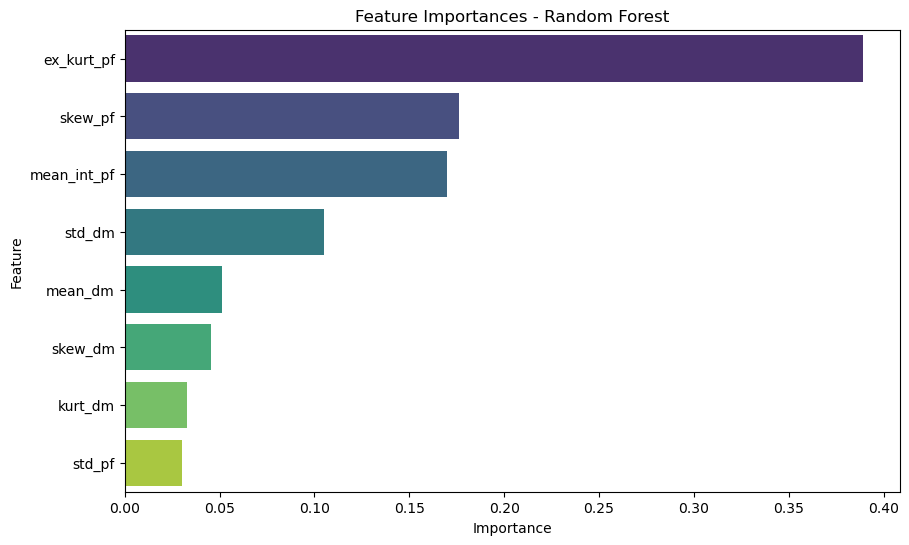

In [12]:
# Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': np.arange(100, 501, 100),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'max_features': ['sqrt', 'log2', None]
}

rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=15, cv=2, n_jobs=-1, verbose=2, random_state=42)
rf_model.fit(X_train_scaled, y_train)
best_rf_model = rf_model.best_estimator_

# Feature Importances
if hasattr(best_rf_model, "feature_importances_"):
    feature_importances = best_rf_model.feature_importances_
    feature_names = X_train.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print("Feature Importances:\n", importance_df)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
    plt.title('Feature Importances - Random Forest')
    plt.show()


#### Model 3
#### Neural Network Model

In [14]:
# Hyperparameter Tuning
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'tol': [1e-4, 1e-5],
    'early_stopping': [True],
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [10, 20],
    'max_iter': [500, 1000, 3000]
}

mlp_model = RandomizedSearchCV(MLPClassifier(random_state=42), mlp_param_grid, n_iter=15, cv=2, n_jobs=-1, verbose=2, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
best_mlp_model = mlp_model.best_estimator_

Fitting 2 folds for each of 15 candidates, totalling 30 fits


#### Classifier
### This block creates a Voting Classifier using the Best Models.
#### Combines the best models into a Voting Classifier that combines their predictions

In [16]:
voting_clf = VotingClassifier(
    estimators=[('svm', best_svm_model), ('rf', best_rf_model), ('mlp', best_mlp_model)], 
    voting='hard', 
    weights=[8, 2, 3]
)
voting_clf.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('svm',
                              SVC(C=1, cache_size=500, coef0=0, kernel='linear',
                                  max_iter=10000, probability=True,
                                  tol=0.0001)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     max_depth=30,
                                                     max_features='log2',
                                                     min_samples_split=5,
                                                     random_state=42)),
                             ('mlp',
                              MLPClassifier(early_stopping=True, max_iter=1000,
                                            n_iter_no_change=20,
                                            random_state=42,
                                            validation_fraction=0.2))],
                 weights=[8, 2, 3])

### This function evaluates model performance.

In [18]:
def evaluate_model(model_name, y_true, y_pred):
    print(f"{model_name} Accuracy: {accuracy_score(y_true, y_pred) * 100:.2f}%")
    print(f"{model_name} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{model_name} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}\n")
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap='Blues', xticklabels=['Non-pulsar', 'Pulsar'], yticklabels=['Non-pulsar', 'Pulsar'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


### This block prints ROC Curve for each model

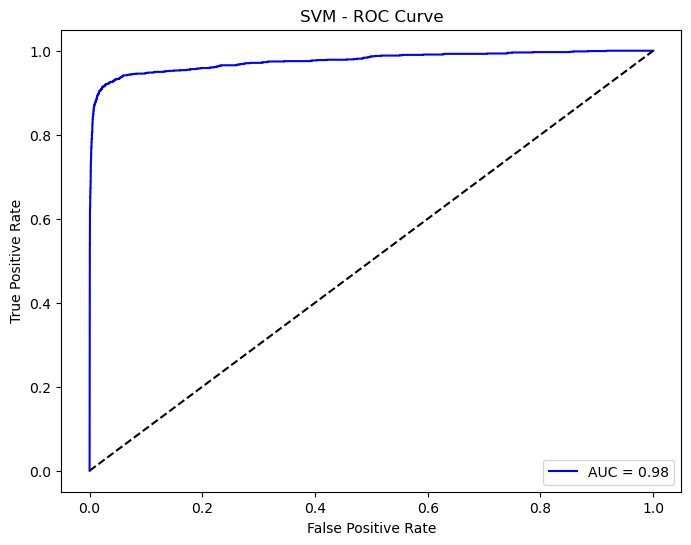

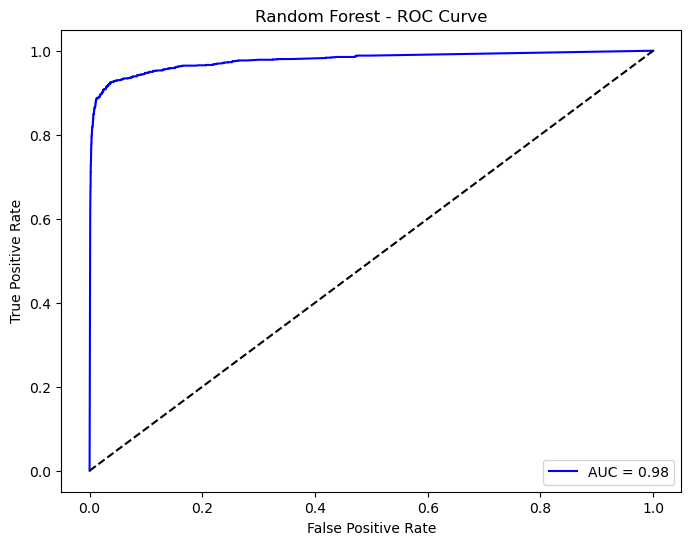

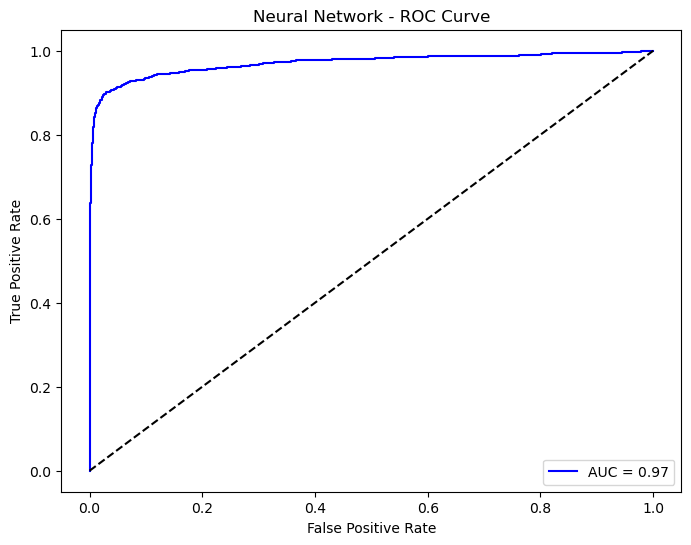

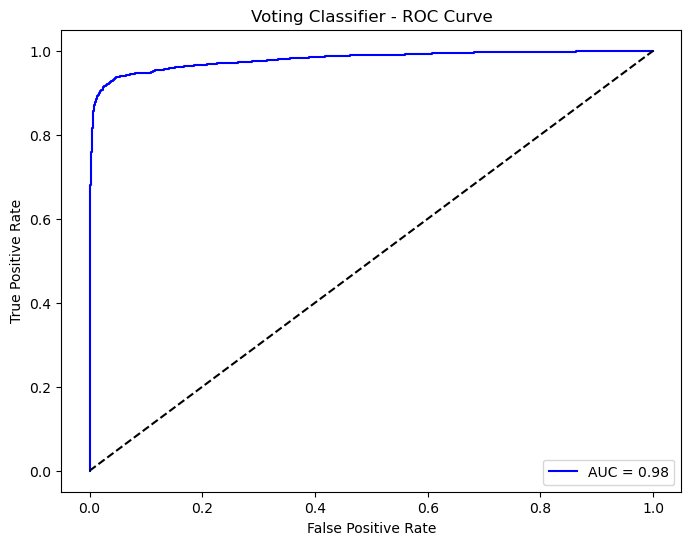

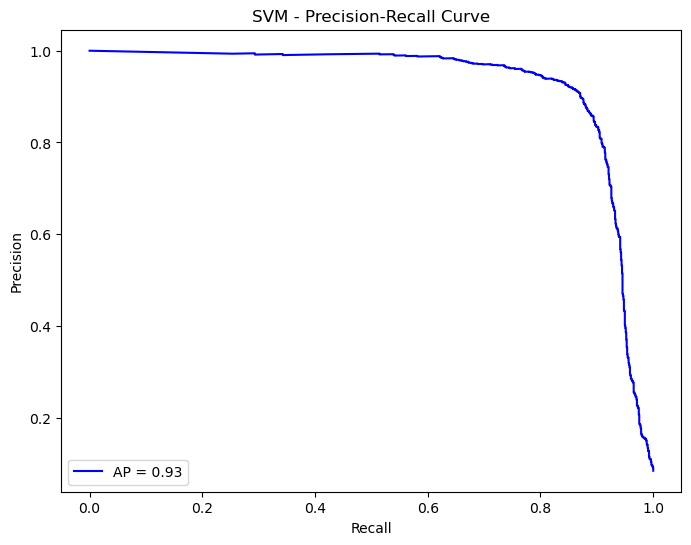

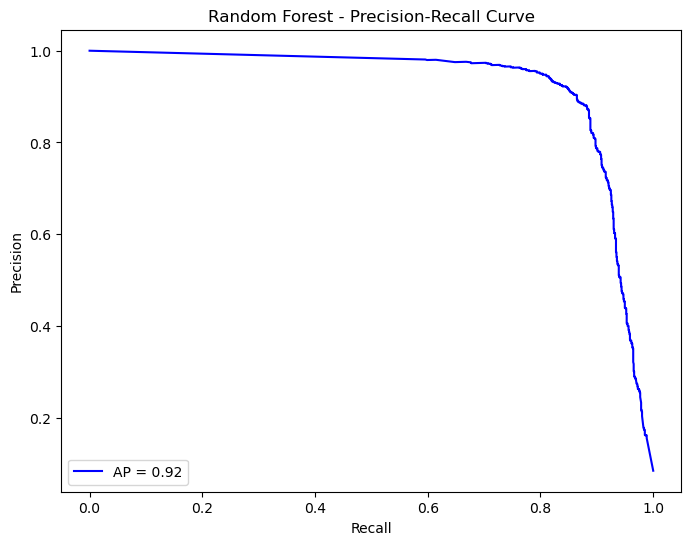

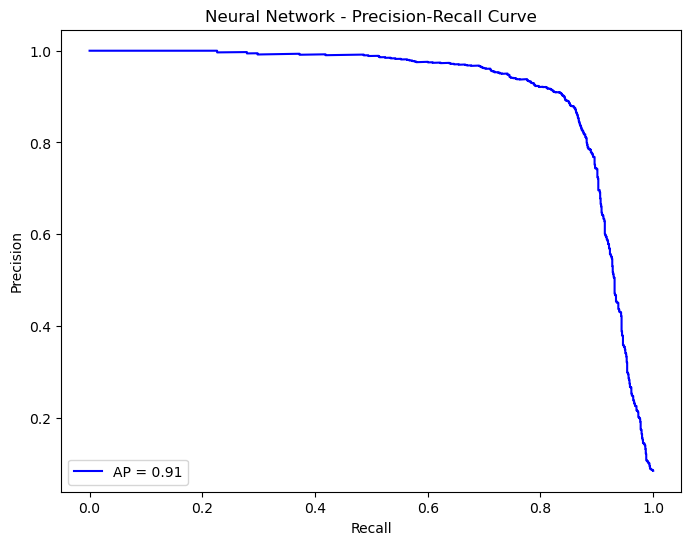

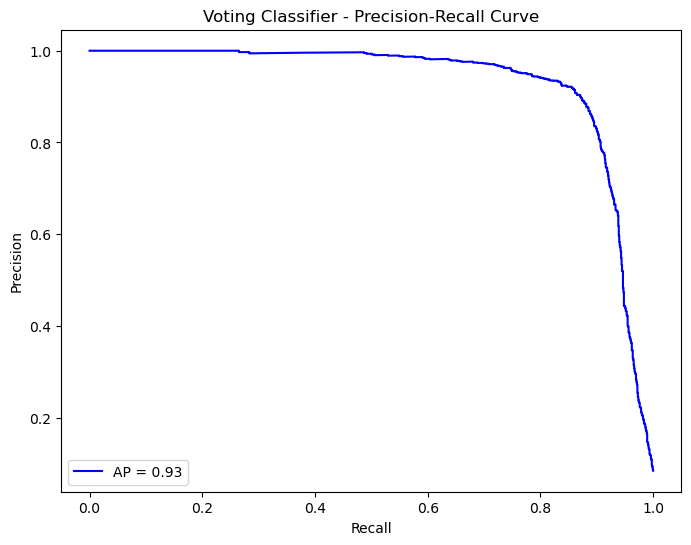

In [20]:
# ROC Curve
plot_roc_curve(best_svm_model, X_test_scaled, y_test, "SVM")
plot_roc_curve(best_rf_model, X_test_scaled, y_test, "Random Forest")
plot_roc_curve(best_mlp_model, X_test_scaled, y_test, "Neural Network")
plot_roc_curve(voting_clf, X_test_scaled, y_test, "Voting Classifier")

# Precision-Recall Curves
plot_precision_recall_curve(best_svm_model, X_test_scaled, y_test, "SVM")
plot_precision_recall_curve(best_rf_model, X_test_scaled, y_test, "Random Forest")
plot_precision_recall_curve(best_mlp_model, X_test_scaled, y_test, "Neural Network")
plot_precision_recall_curve(voting_clf, X_test_scaled, y_test, "Voting Classifier")


### This Curve evaluates the prediction of each model and voting classifier
##### Here the Confusion Matrix of each model and classifier is evaluated and displayed


SVM Model Accuracy: 98.16%
SVM Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13108
           1       0.92      0.86      0.89      1211

    accuracy                           0.98     14319
   macro avg       0.95      0.93      0.94     14319
weighted avg       0.98      0.98      0.98     14319

SVM Model Confusion Matrix:
[[13011    97]
 [  166  1045]]



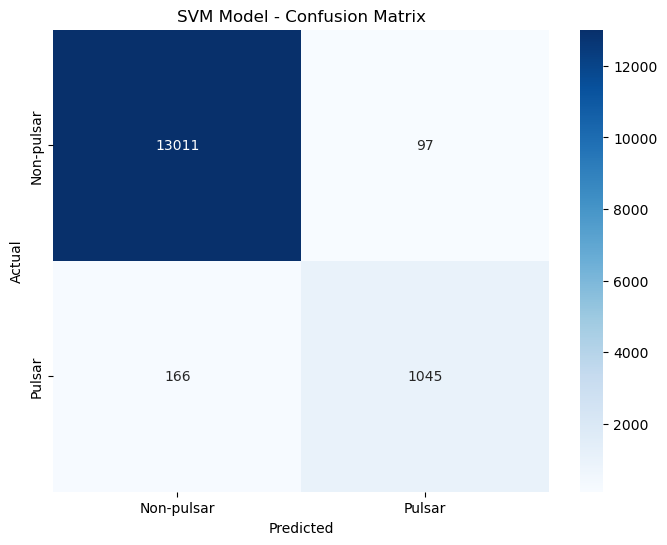

Random Forest Model Accuracy: 97.75%
Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13108
           1       0.85      0.89      0.87      1211

    accuracy                           0.98     14319
   macro avg       0.92      0.94      0.93     14319
weighted avg       0.98      0.98      0.98     14319

Random Forest Model Confusion Matrix:
[[12921   187]
 [  135  1076]]



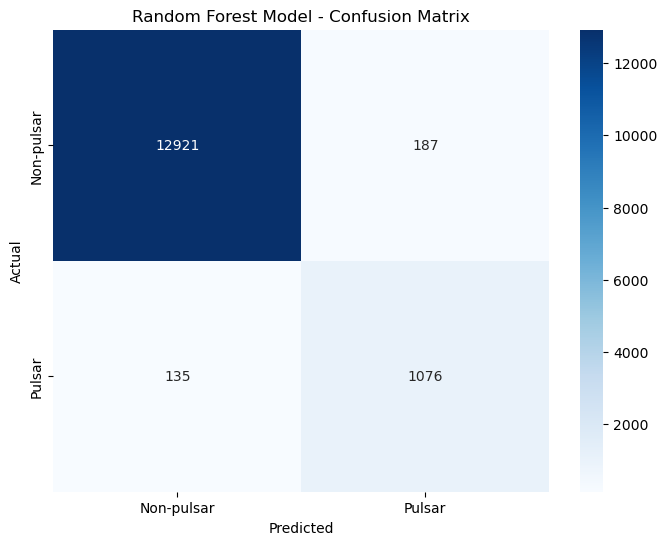

Neural Network Model Accuracy: 97.81%
Neural Network Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13108
           1       0.88      0.85      0.87      1211

    accuracy                           0.98     14319
   macro avg       0.94      0.92      0.93     14319
weighted avg       0.98      0.98      0.98     14319

Neural Network Model Confusion Matrix:
[[12974   134]
 [  180  1031]]



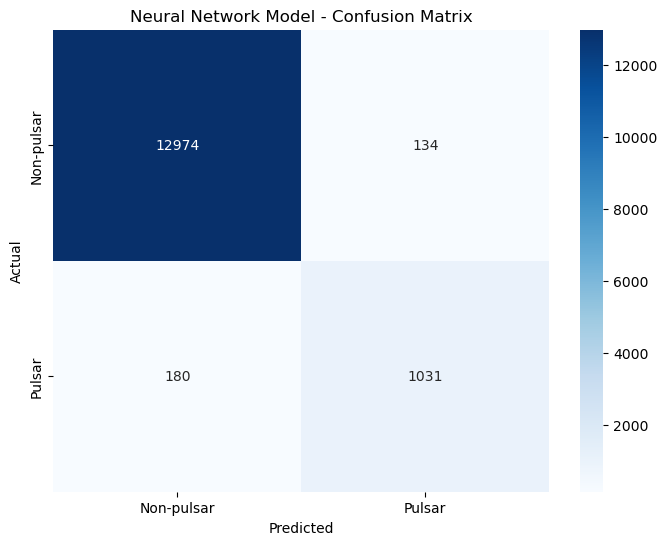

Voting Classifier Accuracy: 98.16%
Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13108
           1       0.92      0.86      0.89      1211

    accuracy                           0.98     14319
   macro avg       0.95      0.93      0.94     14319
weighted avg       0.98      0.98      0.98     14319

Voting Classifier Confusion Matrix:
[[13011    97]
 [  166  1045]]



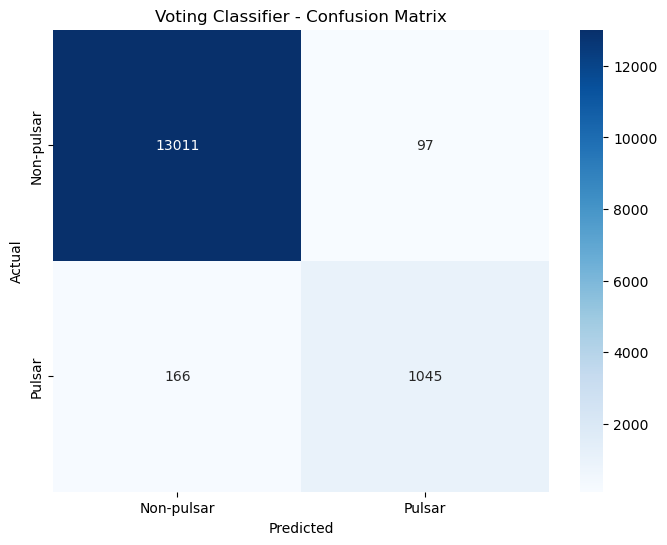

In [22]:
# Prediction by each Model
y_pred_svm = best_svm_model.predict(X_test_scaled)
y_pred_rf = best_rf_model.predict(X_test_scaled)
y_pred_mlp = best_mlp_model.predict(X_test_scaled)
y_pred_voting = voting_clf.predict(X_test_scaled)

# Evaluating models
evaluate_model('SVM Model', y_test, y_pred_svm)
evaluate_model('Random Forest Model', y_test, y_pred_rf)
evaluate_model('Neural Network Model', y_test, y_pred_mlp)
evaluate_model('Voting Classifier', y_test, y_pred_voting)
